In [ ]:
import numpy as np

def tanh(x):
  return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))      

In [ ]:
class Layer:
  lr=0.1

  def __init__(self, input, neur,act,d_act):
    self.W=np.random.randn(neur, input)
    self.b=np.zeros((neur,1))
    self.act=act
    self.d_act=d_act

  def feed_forward(self, A_prev):  
    self.A_prev=A_prev # saved for backpropogation
    self.Z=np.dot(self.W,self.A_prev)+self.b
    self.A=self.act(self.Z)
    return self.A

  def back_prop(self, dA):# All derivatives are with respect to cost like dC/dZ etc.
    dZ=np.multiply(self.d_act(self.Z),dA)
    dW=1/dZ.shape[0]*np.dot(dZ,self.A_prev.T)
    db=1/dZ.shape[0]*np.sum(dZ, axis=1, keepdims=True)
    dA_prev=np.dot(self.W.T,dZ)

    self.W = self.W - self.lr * dW
    self.b = self.b - self.lr * db
    return dA_prev  

In [ ]:
x_train = np.array([[0, 0, 1, 1,1, 1, 0, 0], [0, 1, 0, 1,0, 1, 0, 1]]) # dim x m
y_train = np.array([[0, 1, 1, 0, 1, 0, 0, 1]]) # 1 x m

m = 4
epochs = 1500

layers = [Layer(2, 3, tanh, d_tanh), Layer(3, 1, sigmoid, d_sigmoid)] # Input and output layer
costs = [] # to plot graph



In [ ]:
for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.feed_forward(A)

    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.back_prop(dA)


# Making predictions
A = x_train
for layer in layers:
    A = layer.feed_forward(A)
print(A)

[[7.23597885e-04 9.97284581e-01 9.97294702e-01 3.20641041e-03
  9.97294702e-01 3.20641041e-03 7.23597885e-04 9.97284581e-01]]


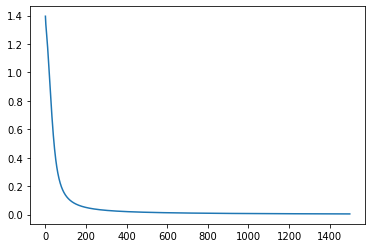

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)
